In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import warnings
def ignore_warn(*args, **kwargs):pass
warnings.warn = ignore_warn
monData=pd.read_csv(r'F:\Moseh\COURS UAC\Cours enseignés\Programmation avancee\Social_Network_Ads.csv')
monData=monData.drop('User ID',axis=1)
monData

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [2]:
monData['Gender'].replace(['Male','Female'],[1,0],inplace=True)

# Analyse exploratoire de mes données

In [3]:
monData.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

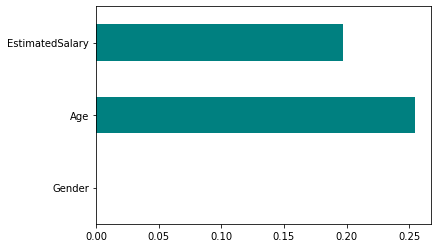

In [4]:
from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
X_Check=monData.drop(columns=['Purchased'])
y_Check=monData['Purchased']
importance=mutual_info_classif(X_Check,y_Check)
feature_importants=pd.Series(importance,monData.columns[0:len(monData.columns)-1])
feature_importants.plot(kind='barh',color='teal')
plt.show()

In [5]:
X=monData.drop(columns=['Gender','Purchased'])
y=monData['Purchased']

# Entraînement du modèle

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y)

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
model=RandomForestRegressor()

In [10]:
print(X_train.shape)
print(X_test.shape)

(300, 2)
(100, 2)


In [11]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier=DecisionTreeClassifier()

In [12]:
dtClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_train_prediction=dtClassifier.predict(X_train)
y_test_prediction=dtClassifier.predict(X_test)

In [14]:
print(y_train_prediction)

[0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0]


In [15]:
y_test_prediction

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import accuracy_score
print(f'Train score {accuracy_score(y_train_prediction,y_train)}')
print(f'Test score {accuracy_score(y_test_prediction,y_test)}')

Train score 0.9966666666666667
Test score 0.83


In [17]:
dtClassifier.classes_

array([0, 1], dtype=int64)

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
classes=['a cliqué sur la publicité ','n\'a pas cliqué sur la publicité']
def graphique_matrice_conf(y_train_prediction,y_train, lengende):
    print(f'Matrice de confusion pour {lengende}')
    cf=confusion_matrix(y_train_prediction,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes,xticklabels=classes,cmap='Blues',fmt='g')
    plt.tight_layout()
    plt.show()

In [19]:
cm = confusion_matrix(y_train_prediction,y_train)
print(cm)

[[193   1]
 [  0 106]]


Matrice de confusion pour Train set


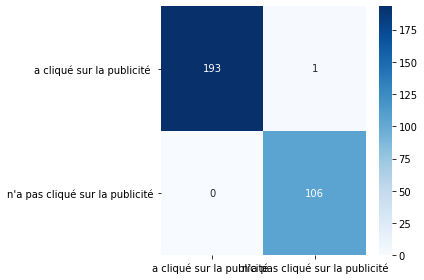

In [20]:
graphique_matrice_conf(y_train_prediction,y_train, lengende='Train set')

Matrice de confusion pour Test set


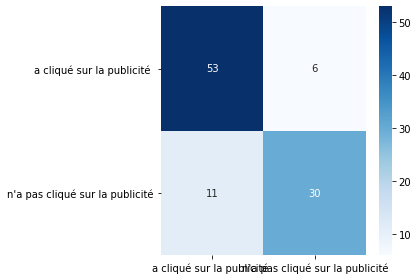

In [21]:
graphique_matrice_conf(y_test_prediction,y_test, lengende='Test set')

# Arbre de décision

In [22]:
from sklearn import tree
features=monData.columns

In [23]:
features

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

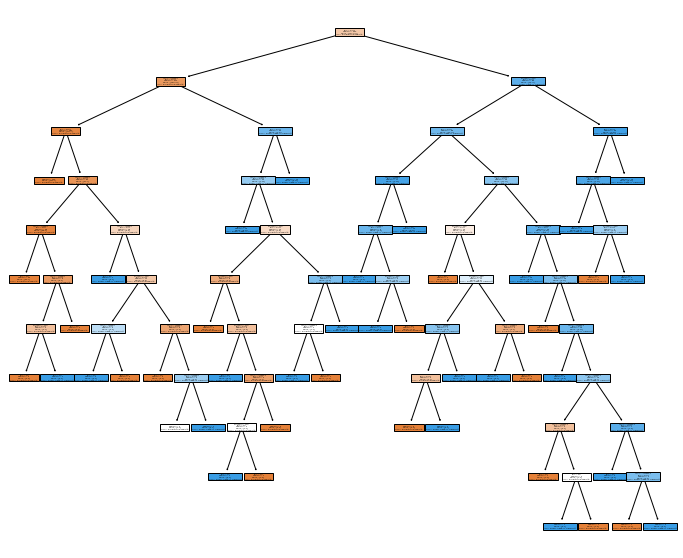

In [24]:
plt.figure(figsize=(12,10))
tree.plot_tree(dtClassifier,feature_names=features,class_names=classes,filled=True)
plt.show()

# Technique de pré-élagage

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
params_grid={'max_depth':[2,3,4,5,6],'min_samples_split':[1,2,3,4,5,],'min_samples_leaf':[1,2,3,4]}

In [27]:
dtClass=DecisionTreeClassifier()
grid=GridSearchCV(dtClass,params_grid)

In [28]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [29]:
grid.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [30]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [31]:
model=grid.best_estimator_

In [32]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [33]:
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(f'Train score {accuracy_score(y_train_predict,y_train)}')
print(f'Test score {accuracy_score(y_test_predict,y_test)}')

Train score 0.91
Test score 0.92


Matrice de confusion pour Train set


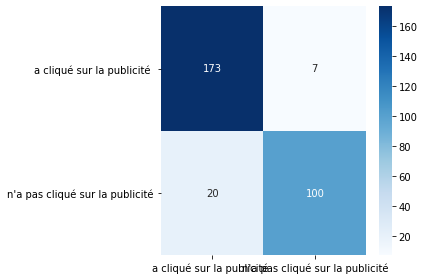

In [35]:
graphique_matrice_conf(y_train_predict,y_train, lengende='Train set')

Matrice de confusion pour Test set


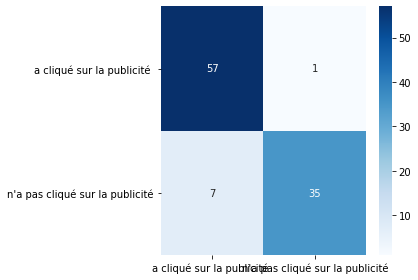

In [36]:
graphique_matrice_conf(y_test_predict,y_test, lengende='Test set')

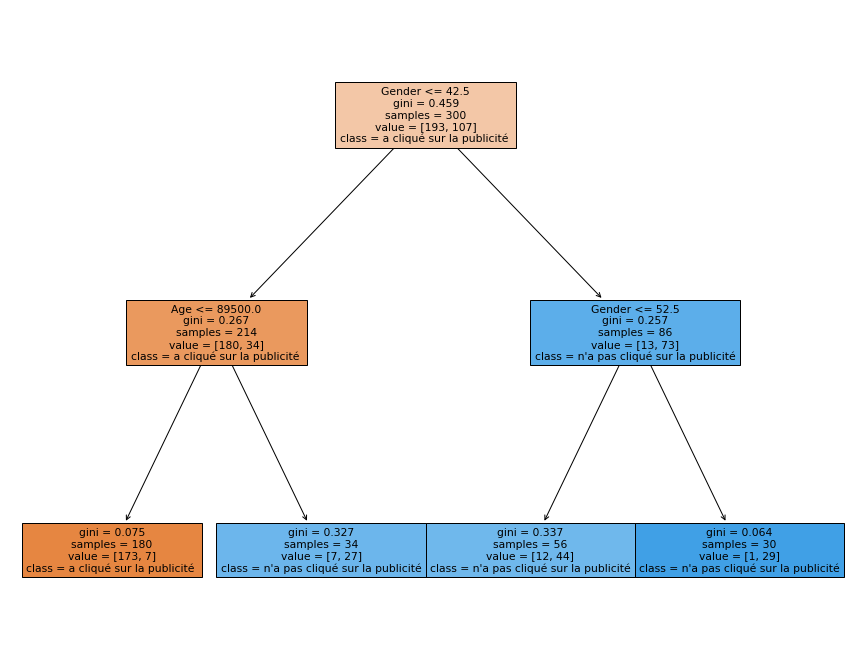

In [37]:
plt.figure(figsize=(15,12))
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
plt.show()

# Post-élagage

In [38]:
chemin=dtClassifier.cost_complexity_pruning_path(X_train,y_train)

In [39]:
ccp_alpha,impurities=chemin.ccp_alphas,chemin.impurities

In [40]:
print(ccp_alpha)

[0.         0.00111111 0.00190476 0.0020915  0.00214815 0.00216524
 0.00222222 0.0025     0.0025     0.00292063 0.00328205 0.00430769
 0.00444444 0.00488889 0.00558146 0.00717806 0.00880719 0.10874353
 0.19469101]


In [41]:
clfs=[]
for i in ccp_alpha:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    clf.fit(X_train,y_train)
    clfs.append(clf)

In [42]:
clfs

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001111111111111111, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001904761904761905, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002091503267973857, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0021481481481481473, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0021652421652421637, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0022222222222222222, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0025, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0025, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.002920634920634919, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0032820512820512827, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0043076923076923075, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004444444444444445, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.004888888888888888, random_state=0),
 DecisionTreeClassifier(ccp_alpha

In [43]:
clfs=clfs[:-1]

In [44]:
ccp_alpha=ccp_alpha[:-1]

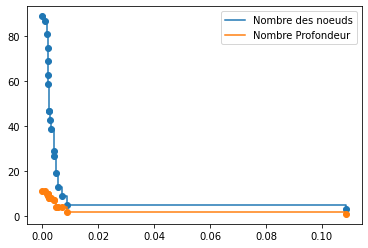

In [45]:
noeud_compte=[clf.tree_.node_count for clf in clfs]
profondeur=[clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alpha,noeud_compte)
plt.scatter(ccp_alpha,profondeur)
plt.plot(ccp_alpha,noeud_compte, label='Nombre des noeuds',drawstyle='steps-post')
plt.plot(ccp_alpha,profondeur, label='Nombre Profondeur',drawstyle='steps-post')
plt.legend()
plt.show()

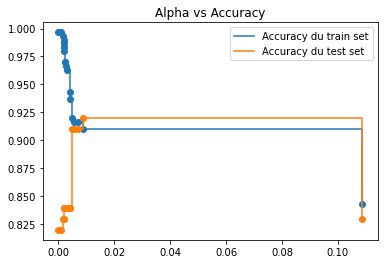

In [46]:
train_accuracy=[]
test_accuracy=[]
for c in clfs:
    y_train_pred=c.predict(X_train)
    y_test_pred=c.predict(X_test)
    train_accuracy.append(accuracy_score(y_train_pred,y_train))
    test_accuracy.append(accuracy_score(y_test_pred,y_test))
plt.scatter(ccp_alpha,train_accuracy)
plt.scatter(ccp_alpha,test_accuracy)
plt.plot(ccp_alpha,train_accuracy,label='Accuracy du train set',drawstyle='steps-post')
plt.plot(ccp_alpha,test_accuracy,label='Accuracy du test set',drawstyle='steps-post')
plt.legend()
plt.title('Alpha vs Accuracy')
plt.show()

In [47]:
model_post_elagage=DecisionTreeClassifier(random_state=0,ccp_alpha=0.01)
model_post_elagage.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=0)

In [48]:
y_train_predi=model_post_elagage.predict(X_train)
y_test_predi=model_post_elagage.predict(X_test)

In [49]:
print(f'Train score {accuracy_score(y_train_predi,y_train)}')
print(f'Test score {accuracy_score(y_test_predi,y_test)}')

Train score 0.91
Test score 0.92


Matrice de confusion pour Train set


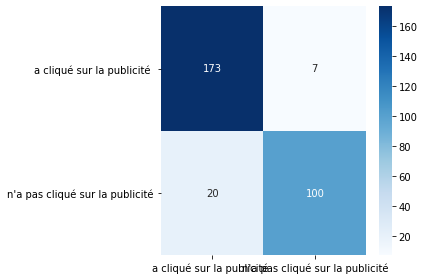

In [50]:
graphique_matrice_conf(y_train_predi,y_train, lengende='Train set')

Matrice de confusion pour Test set


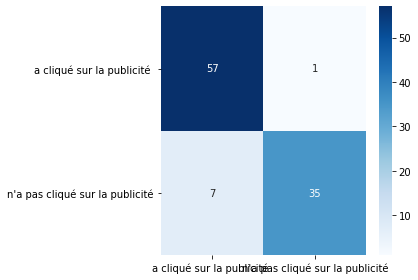

In [51]:
graphique_matrice_conf(y_test_predi,y_test, lengende='Test set')

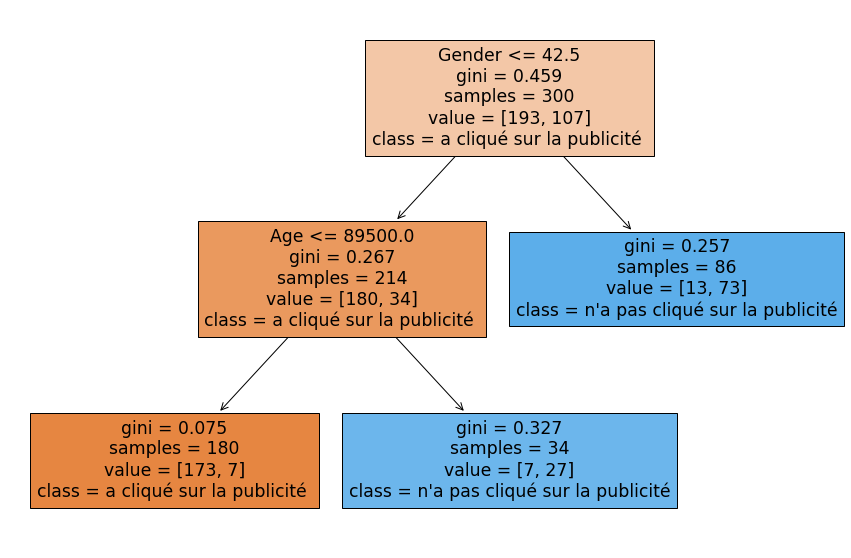

In [52]:
plt.figure(figsize=(15,10))
tree.plot_tree(model_post_elagage,feature_names=features,class_names=classes,filled=True)
plt.show()

In [53]:
import numpy as np
def heart(model_post_elagage,Age=50,EstimatedSalary=20000):
    x=np.array([Age,EstimatedSalary]).reshape(1,2)
    print(model_post_elagage.predict(x))

In [54]:
heart(model_post_elagage)

[1]


# Exportation du modèle avec joblib

In [55]:
import joblib

In [56]:
joblib.dump(model,'ModelSocial.ml')

['ModelSocial.ml']